<a href="https://colab.research.google.com/github/erenofc28/IPL---Score---Prediction/blob/main/IPL_Score_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [334]:
df = pd.read_csv('/content/0y clean data pre ipl.csv')

In [335]:
df.head()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [336]:
from sklearn.preprocessing import LabelEncoder

In [337]:
txt_cols = ["venue","batting_team","bowling_team","striker","non_striker","bowler"]
dic = {}
for col in txt_cols:
  dic[col] = LabelEncoder()
  df.loc[:,col] = dic[col].fit_transform(df[col])


In [338]:
df.head()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,15,1,0.1,7,13,186,30,201,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,15,1,0.2,7,13,30,184,201,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,15,1,0.3,7,13,30,184,201,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,15,1,0.4,7,13,30,184,201,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,15,1,0.5,7,13,30,184,201,0.0,0.0,,,0.0,0.0,2.0,68.0


In [339]:
df.tail()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
32173,32173,1178420,31,1,6.2,14,10,48,126,220,1.0,0.0,,,1.0,1.0,53.0,57.0
32174,32174,1178420,31,1,6.3,14,10,127,47,220,1.0,0.0,,,1.0,1.0,54.0,57.0
32175,32175,1178420,31,1,6.4,14,10,48,126,220,1.0,0.0,,,1.0,1.0,55.0,57.0
32176,32176,1178420,31,1,6.5,14,10,127,47,220,1.0,0.0,,,1.0,1.0,56.0,57.0
32177,32177,1178420,31,1,6.6,14,10,48,126,220,1.0,0.0,,,1.0,1.0,57.0,57.0


In [340]:
df = df.drop(columns=["Unnamed: 0","match_id","wicket_type","player_dismissed"])

In [341]:
import seaborn as sns

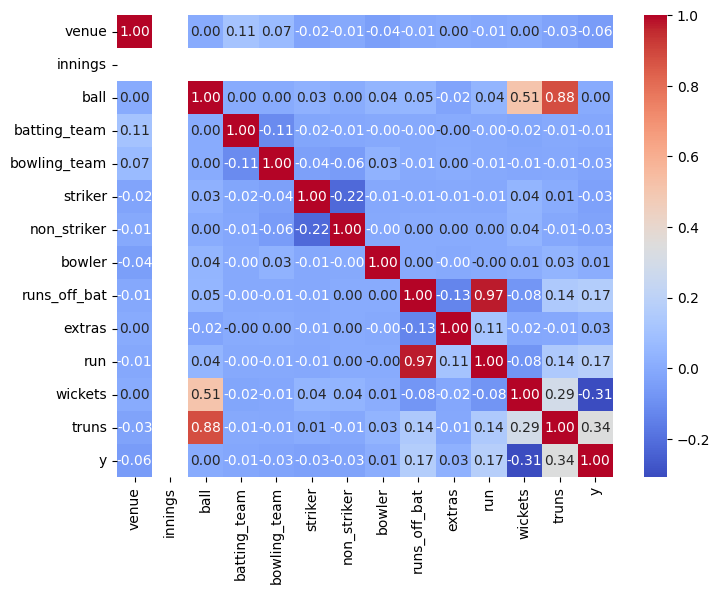

In [342]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),fmt=".2f",cmap="coolwarm",annot=True)
plt.show()

In [343]:
y = df["y"]
X = df.drop(columns=["y"])

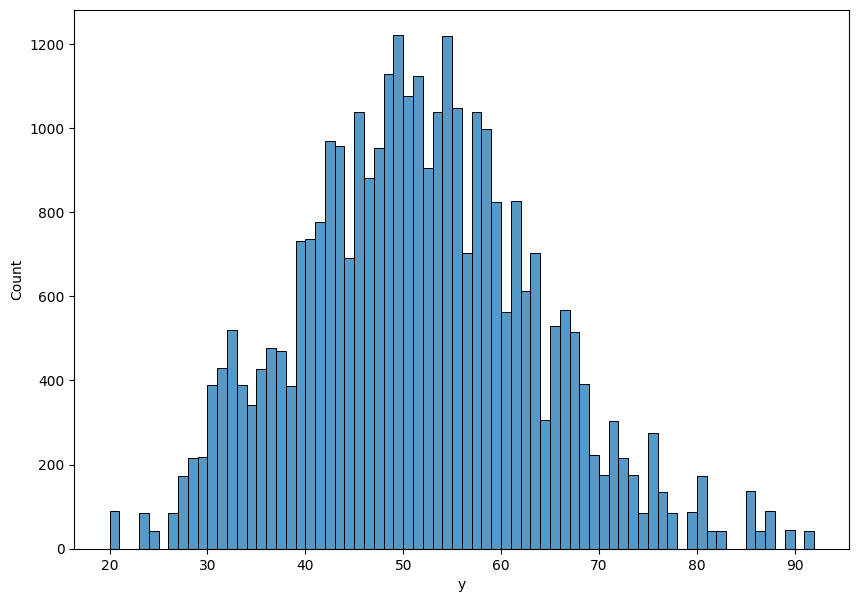

In [344]:
plt.figure(figsize=(10,7))
sns.histplot(x=y)
plt.show()

In [345]:
X.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,run,wickets,truns
0,15,1,0.1,7,13,186,30,201,0.0,1.0,1.0,0.0,1.0
1,15,1,0.2,7,13,30,184,201,0.0,0.0,0.0,0.0,1.0
2,15,1,0.3,7,13,30,184,201,0.0,1.0,1.0,0.0,2.0
3,15,1,0.4,7,13,30,184,201,0.0,0.0,0.0,0.0,2.0
4,15,1,0.5,7,13,30,184,201,0.0,0.0,0.0,0.0,2.0


In [346]:
from xgboost import XGBRegressor

In [347]:
model = XGBRegressor()

In [348]:
X.loc[:,"venue"] = LabelEncoder().fit_transform(X["venue"]).astype(int)

In [349]:
X["venue"].unique()

array([15, 26, 9, 8, 39, 31, 28, 18, 5, 22, 35, 14, 37, 3, 21, 4, 23, 2,
       29, 1, 38, 11, 20, 12, 6, 36, 32, 13, 34, 33, 7, 19, 25, 30, 10,
       16, 17, 0, 27, 24], dtype=object)

In [350]:
X.loc[:,"venue"] = X["venue"].astype(int)

In [351]:
X = X.apply(pd.to_numeric, errors='raise')


In [352]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=3,test_size=0.2)

In [353]:
from sklearn.model_selection import GridSearchCV

In [354]:
params = {"n_estimators":[200,100],
          "learning_rate":[0.05,0.5],
          "max_depth":[6,5],
          "reg_alpha":[1,0.5,2]
          }

In [355]:
grid_search = GridSearchCV(model,params,cv=5,scoring="neg_mean_absolute_error")

In [356]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.5], 'max_depth': [6, 5],
                         'n_estimators': [200, 100], 'reg_alpha': [1, 0.5, 2]},
             scoring='neg_mean_absolute_error')

In [357]:
print("best params : ",grid_search.best_params_)
print("best score : ",grid_search.best_score_)

best params :  {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 2}
best score :  -2.84158327729675


In [358]:
best_params = grid_search.best_params_

In [359]:
model = XGBRegressor(**best_params)

In [360]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [361]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32178 entries, 0 to 32177
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   venue         32178 non-null  int64  
 1   innings       32178 non-null  int64  
 2   ball          32178 non-null  float64
 3   batting_team  32178 non-null  int64  
 4   bowling_team  32178 non-null  int64  
 5   striker       32178 non-null  int64  
 6   non_striker   32178 non-null  int64  
 7   bowler        32178 non-null  int64  
 8   runs_off_bat  32178 non-null  float64
 9   extras        32178 non-null  float64
 10  run           32178 non-null  float64
 11  wickets       32178 non-null  float64
 12  truns         32178 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 3.2 MB


In [362]:
from sklearn.metrics import mean_absolute_error,r2_score

In [363]:
pred = model.predict(x_train)
print("training MAE : ",mean_absolute_error(pred,y_train))
print("r2 score (training data): ",r2_score(pred,y_train))

training MAE :  1.5483046584210467
r2 score (training data):  0.9675175465950661


In [364]:
pred = model.predict(x_test)
print("test MAE : ",mean_absolute_error(pred,y_test))
print("r2 score (test data): ",r2_score(pred,y_test))

test MAE :  2.678768315472315
r2 score (test data):  0.893429985550086


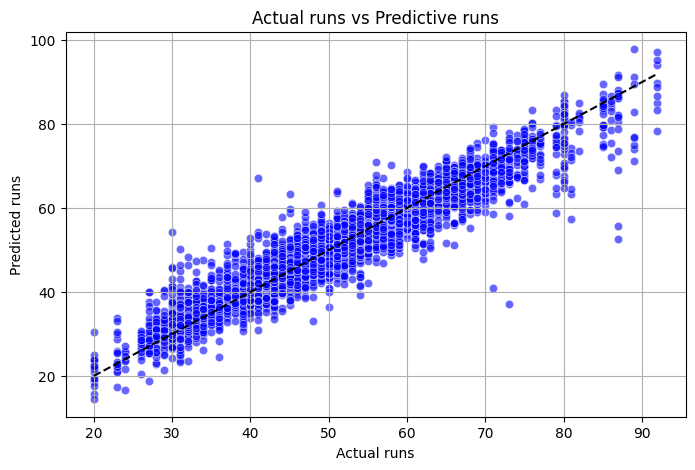

In [365]:
y_pred = model.predict(x_test)

plt.figure(figsize=(8,5))
sns.scatterplot(x = y_test , y = y_pred , color="blue" , alpha = 0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"--",color="black")
plt.title("Actual runs vs Predictive runs")
plt.xlabel("Actual runs")
plt.ylabel("Predicted runs")
plt.grid(True)
plt.show()

In [367]:
def predict(input):
  input = np.asarray(input)
  input = input.reshape(1,-1)
  pred = model.predict(input)
  print(pred[0])

In [373]:
input = (19	,1	,0.6	,11	,13	,165	,18,	22	,0.0	,1.0	,1.0	,0.0	,4.0) # actual score : 51
predict(input) # prediction score : 50

50.734722


In [369]:
x_test.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,run,wickets,truns
31255,16,1,4.6,13,14,130,7,239,1.0,0.0,1.0,2.0,39.0
27619,15,1,6.1,7,8,68,79,149,4.0,0.0,4.0,3.0,29.0
17927,34,1,2.3,5,7,221,226,298,1.0,0.0,1.0,1.0,10.0
20174,6,1,0.3,14,7,179,47,106,1.0,0.0,1.0,0.0,2.0
26505,19,1,0.6,11,13,165,18,22,0.0,1.0,1.0,0.0,4.0


In [370]:
y_test.head()

,y
31255,51.0
27619,31.0
17927,56.0
20174,50.0
26505,51.0
